In [5]:
import numpy as np
import pandas as pd
import random
import math
from sklearn.cluster import KMeans

In [436]:
class EM(object):
    '''Class for Implementing Expectation Minimization Algorithm'''
    def __init__(self, data, k, d):
        '''
        data = the d dimensional data points
        k = number of clusters
        d = number of dimensions
        '''
        self.X = data
        self.k = k
        self.d = d
        self.N = len(data)
        self.mean = None 
        self.covariance = None
        self.r = [[0 for _ in range(k)] for _ in range(len(data))]
        self.m_c = [0 for _ in range(k)]
        self.pi_c = [0 for _ in range(k)]
        
    def _initialze(self):
        '''
        Function To Initialize the Expectation Step
        '''
    
    def dis(self, a, b, X):
        return (np.sqrt(X[a][0]-X[b][0])**2+(X[a][1]-X[b][1])**2)

    
    def random_init(self):
        l = random.sample(range(self.N), 4)
        self.mean = np.array([self.X[i] for i in l])
        var = []
        for i in range(4):
            var.append(np.identity(self.d))
        self.covariance = np.array(var)
        for i in range(self.k):
            self.pi_c[i] = 1/self.k
        
        

    def kmpp(self):
        # k is number of centers
        # X is the data
        curr_points = []
        n = self.X.shape[0]
        curr_points.append(random.randint(0,n-1))

        for i in range(self.k-1):
            prob = np.zeros((n,1))
            mini = float('inf')
            for j in range(n):
                for l in curr_points:
                    temp = self.dis(l, j, self.X)
                    if(temp < mini):
                        mini = temp
                        prob[j] = mini
            prob = prob/sum(prob)
            curr_points.append(np.random.choice(n,1,list(prob))[0])
        centers = np.array([self.X[i] for i in curr_points])
        kmeans = KMeans(n_clusters=4, init = centers, max_iter = 1).fit(self.X)
        labels = kmeans.labels_
        clusters = {}
        var = {}
        for i in range(self.k):
            clusters[i]=[]
            var[i] = {}
        for i in range(len(self.X)):
            clusters[labels[i]].append(self.X[i])
            for j in range(self.d):
                try:
                    var[labels[i]][j].append(self.X[i][j])
                except:
                    var[labels[i]][j] = [self.X[i][j]]
        MEANS = []
        VARIANCE = []
        for i in range(self.k):
            MEANS.append(np.mean(clusters[i], axis = 0))
            VARIANCE.append(np.zeros((self.d, self.d)))
            for j in range(self.d):
                VARIANCE[i][j][j] = np.var(var[i][j])
        self.mean = MEANS
        self.covariance = VARIANCE  
        for i in range(self.k):
            self.pi_c[i] = 1/self.k
            
            
    def Gaussian(self, x, mean, covar):
        '''
        Calculates Gaussian Probability
        '''
        num = math.exp(-0.5*np.dot(np.dot((x-mean).T, np.linalg.inv(covar)), x-mean))
        den = math.sqrt(2*math.pi*np.linalg.det(covar))
        return num/den
        
    def E_Step(self):
        '''
        Computers ric (confidence score) for each data point
        '''
        for i in range(self.N):
            den = 0
            for j in range(self.k):
                den += self.pi_c[j]*self.Gaussian(self.X[i], self.mean[j], self.covariance[j])
            for c in range(self.k):
                self.r[i][c] = self.pi_c[c]*self.Gaussian(self.X[i], self.mean[c], self.covariance[c])/den
    
    def M_Step(self):
        '''
        Maximization Step : Updates the Parameters (mean, covariacne, pi_c)
        '''
        for c in range(self.k):
            temp = 0
            mu_temp = 0
            var_temp = 0
            for i in range(self.N):
                temp += self.r[i][c]
                mu_temp += self.r[i][c]*self.X[i]
            self.m_c[c] = temp
            self.pi_c[c] = temp/self.N
            self.mean[c] = mu_temp/temp
            for i in range(self.N):
                var_temp += self.r[i][c]*np.dot(np.reshape(self.X[i]-self.mean[c], (self.d,1)), np.reshape(self.X[i]-self.mean[c], (1, self.d)))
            self.covariance[c] = var_temp/temp 
    
    def train(self, num_iter, visualize = None):
        for i in range(num_iter):
            self.E_Step()
            self.M_Step()
            if visualize :
                print(self.covariance)
#                 plt.scatter(self.X[:,[0]], self.X[:,[1]])
#                 plt.scatter(self.mean[:,[0]].ravel(), self.mean[:,[1]].ravel(), c = np.array([-1,-1,-1,-1]))
            

In [18]:
mean = np.zeros(4)
var  = np.diag(np.ones(4))
np.random.multivariate_normal(mean, var, size = (1, 1))

array([[[-1.16861883,  0.40733924, -0.28855449, -0.26653416]]])

In [6]:
def gauss_2d(mu1,mu2,sigma1, sigma2):
    x = random.gauss(mu2, sigma1)
    y = random.gauss(mu1, sigma2)
    return (x, y)

In [7]:
points = np.zeros((4,100,2))
acu_points = np.zeros((400,2))
t = 0
for j in range(4):
    for i in range(100):
        if(j==0):
            temp = gauss_2d(10,0,1,1)
            points[j][i] = temp
        
        if(j==1):
            temp = gauss_2d(0,10,1,1)
            points[j][i] = temp
        if(j==2):
            temp = gauss_2d(-10,0,1,1)
            points[j][i] = temp
        if(j==3):
            temp = gauss_2d(0,-10,1,1)
            points[j][i] = temp
        acu_points[t] = temp
        t = t + 1

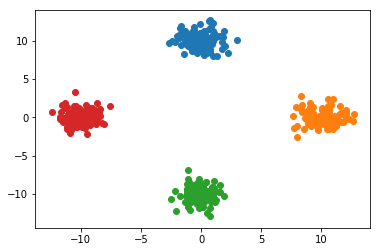

In [13]:
import matplotlib.pyplot as plt
for j in range(4):
    plt.scatter(points[j][:,0],points[j][:,1])
plt.show()

In [25]:
dim = 2
k = 4

In [285]:
new_points = points.reshape(points.shape[0]*points.shape[1],2)

In [445]:
model = EM(new_points, k, dim)
model.random_init()

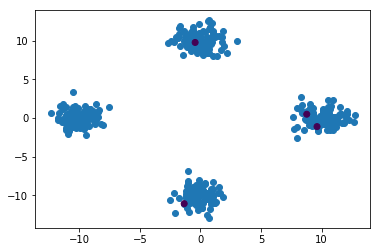

In [446]:
plt.scatter(new_points[:,[0]], new_points[:,[1]])
m = np.array(model.mean)
plt.scatter(m[:,[0]].ravel(), m[:,[1]].ravel(), c = np.array([-1,-1,-1,-1]))

In [449]:
model.train(100)

In [386]:
model.mean

[array([10.13763708,  0.01994937]),
 array([-0.08525398,  9.99604012]),
 array([ -0.08615102, -10.12063503]),
 array([-10.0877076 ,   0.04114049])]

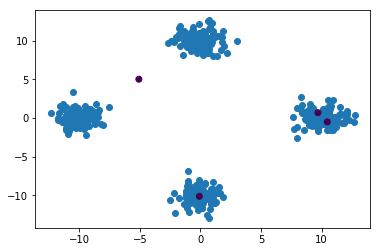

In [451]:
new_points[:,[1]]
plt.scatter(new_points[:,[0]], new_points[:,[1]])
m = np.array(model.mean)
plt.scatter(m[:,[0]].ravel(), m[:,[1]].ravel(), c = np.array([-1,-1,-1,-1]))

In [429]:
import random
z = random.sample(range(10), 4)
z

[4, 6, 9, 0]